In [1]:
%matplotlib inline
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rcParams
import seaborn
from tqdm import tqdm,tqdm_gui
from scipy.optimize import curve_fit
import sympy as sm
rcParams['figure.figsize'] = (12.0, 7.0)
from IPython.core.debugger import Tracer

1) Υπολογίςτε, με ακρίβεια 1%, τη ροπή αδράνειας μονοδιάστατης ράβδου με γραμμική πυκνότητα $\rho(x)=1+e^x$
με $0.< x <2.$, ως προσ άξονα περιστροφής που περνά από το σημείο $x=0$. 
Επιβεβαιώστε,συγκρίνοντας με το αναλυτικό αποτέλεσμα, ότι πράγματι πετύχατε την
ακρίβεια που επιδιώκατε. 
* Πόσοι υπολογισμοί της $\rho(x$) είναι απαραίτητοι αν χρησιμοποιήςετε τη μέθοδο Τραπεζίου και πόσοι αν
χρησιμοποιήσετε τη μέθοδο Simpson 1/3;

* Η εκτίμηση τησ αβεβαιότητας να πραγματοποιηθεί στον αλγόριθμο με υπολογιστική διαδικασία, ενώ η απόκλιση από την πραγματική τιμή να γίνει μετά από αναλυτική επίλυση του ολοκληρώματος. 

In [2]:
def rho(x): return 1.+np.exp(x)

In [3]:
xx=np.linspace(0,2)

$$ 
I=\int_0^2 x^2 \rho (x) dx = \frac{x^3}{3} + e^x (x^2 - 2 x + 2) = 8/3+2 e^2-2 = 2/3+2 e^2=15.445 
$$

In [4]:
av=15.4447788645280

In [5]:
av+av*0.01,av-av*0.01

(15.59922665317328, 15.29033107588272)

In [6]:
def f(x): return x**2 *rho(x)
def ddf(x): return  np.exp(x)*(x**2 + 4.*x + 2.) + 2.

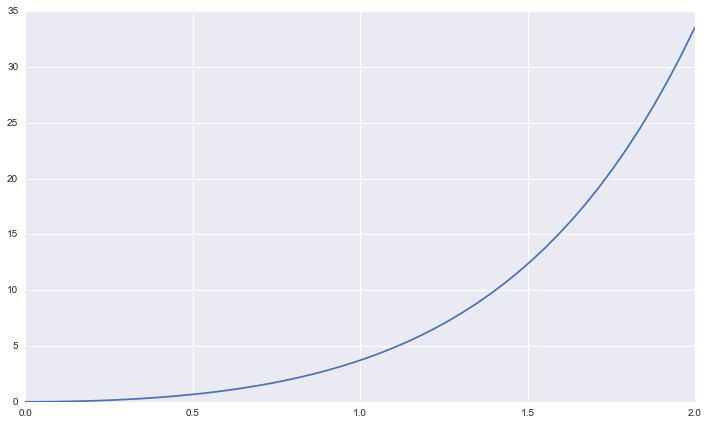

In [34]:
plt.plot(xx,f(xx))

In [7]:
((12.*av*0.01/ddf(xx))**(1./3)).min()

0.26000190620829161

In [8]:
2./8

0.25

## Μέθοδος  Τραπεζίου
$$
\int_a^b f(x) dx = (b-a) f\Big(\frac{a+b}{2}\Big) \pm \frac{(b-a)^ 3}{12} f''(x) \\
$$

$$ 
\int_a^b f(x) dx = \sum (x_1-x_0) f\Big(\frac{x_0+x_1}{2}\Big)
$$
$$
    \frac{h^ 3}{12} f''(x) = 0.1544478 \rightarrow h=\Big(\frac{185.33734637}{f''(x)} \Big)^{1/3}
$$

In [41]:
def rRect(f,a,b,n):
    D=np.linspace(a,b,n)
    h=D[1]-D[0]
    S=np.array([])
    k=0
    for i in range(len(D[:-1])):
        x0=D[k]
        x1=D[k+1]
        S=np.append(S,h/2. *(f(x0)+f(x1))) #diorthwsi
        k=k+1
        #print x0,x1,f(x0),f(x1),h,S[-1]
    return S.sum()
def rSimpson(f,a,b,n):
    D=np.linspace(a,b,n)
    h=D[1]-D[0]
    S=np.array([])
    k=0
    for i in range(len(D[:-1])):
        x0=D[k]
        x1=D[k+1]
        S=np.append(S,(x1-x0)/6. *(f(x0)+4.*f((x0+x1)/2.)+f(x1)))
        k=k+1
        #print x0,x1,S[-1]
    return S.sum()

In [94]:
ns=np.arange(2,15,1)

In [95]:
[rRect(f,0.,2.,i) for i in ns]

[33.556224395722602,
 20.496394026320349,
 17.740194982214906,
 16.746187376128013,
 16.280752687564487,
 16.026482681587755,
 15.872671702421492,
 15.772642604111329,
 15.703971819761502,
 15.654806429110156,
 15.618405097026598,
 15.59070493161652,
 15.569139332944598]

In [96]:
[rSimpson(f,0.,2.,i) for i in ns]

[16.143117236519593,
 15.496118492730567,
 15.455245248045374,
 15.448127680105767,
 15.446157676292039,
 15.445445681626111,
 15.445139410031,
 15.44499044386597,
 15.44491105284127,
 15.444865640432372,
 15.44483815748357,
 15.444820742124293,
 15.444809275951897]

In [97]:
(16.143117236519593-av)/av

0.04521517453354191

In [98]:
Trap=[np.abs(rRect(f,0.,2.,i)-av)/av for i in ns]

In [99]:
Simps=[np.abs(rSimpson(f,0.,2.,i)-av)/av for i in ns]

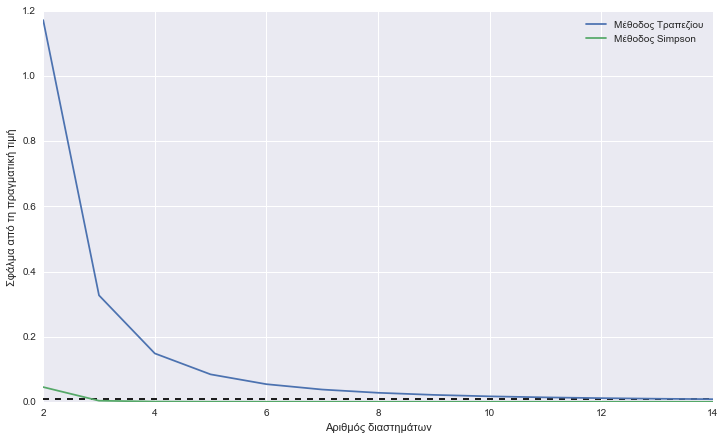

In [102]:
plt.plot(ns,Trap,label=u'Μέθοδος Τραπεζίου')
plt.plot(ns,Simps,label=u'Μέθοδος Simpson')
plt.xlabel(u'Αριθμός διαστημάτων')
plt.ylabel(u'Σφάλμα από τη πραγματική τιμή')
plt.hlines(0.01,2,14,linestyles='--')
plt.legend()

In [11]:
def Rect(f,a,b): return (b-a)*f((a+b)/2)
def Simpson(f,a,b): return (b-a)/6. *(f(a)+4.*f((a+b)/2.)+f(b))

2) Με τη χρήςη των μεθόδων Euler και Runge-Kutta τέταρτης τάξης να λυθεί το πρόβλημα της ρίψης σφαίρας με αρχική ταχυτητα $20 m/s$ και γωνία ρίψης π/3. Ερευνήςτε την ακρίβεια των δυο μεθόδων ως συνάρτηση:

* του χρόνου (αριθμός βημάτων για την ίδια χρονική διαμεριση) και 
* του μεγεθους του χρονικου βήματος. 
Να γίνουν οι γραφικες παραςτάσεις των αποτελεσμάτων και των διαφορων των αριθμητικων μεθόδων. Να δικαιολογηθουν τα αποτελεσματα.

## Συναρτήσεις μεθόδων αριθμητικής ολοκλήρωσης
Και στις δύο μεθόδους δίνουμε την διαφορική συνάρτηση σε μορφή πίνακα. Δηλαδή λύνουμε το σύστημα:
$$
\dot{\mathbf{X}}=
\begin{pmatrix}
\dot{x} \\ \dot{u}_x
\end{pmatrix}=
\begin{pmatrix}
u_x \\ 0
\end{pmatrix}
$$
και
$$
\dot{\mathbf{Y}}=
\begin{pmatrix}
\dot{y} \\ \dot{u}_y
\end{pmatrix}
=
\begin{pmatrix}
u_y \\ -g
\end{pmatrix}
$$
### Μέθοδος Euler
$$
\begin{pmatrix}
x_{i+1} \\ u_{x,i+1}
\end{pmatrix}=
\begin{pmatrix}
x_{i} \\u_{x,i}
\end{pmatrix}+
\begin{pmatrix}
u_{x,i} \\ 0
\end{pmatrix}
$$

In [39]:
def Euler(df,y0,T): 
    y=np.array(y0,ndmin=2) #Αρχικές τιμές (πίνακας θέσης,ταχύτητας)
    dt=T[2]-T[1] #step size
    for i,t in enumerate(T[1:]):
        y=np.vstack((y,y[-1]+df(t,y[-1][0],y[-1][1])*dt)) #Μέθοδος Euler
    return y
def RungeKutta(df,y0,T):
    y=np.array(y0,ndmin=2)
    dt=T[2]-T[1]
    for i,t in enumerate(T[1:]):
        k1=df(t,y[-1][0],y[-1][1])
        k2=df(t+dt*0.5,y[-1][0]+k1[0]*0.5*dt,y[-1][1]+k1[1]*0.5*dt)
        k3=df(t+dt*0.5,y[-1][0]+k2[0]*0.5*dt,y[-1][1]+k2[1]*0.5*dt)
        k4=df(t+dt,y[-1][0]+k3[0]*dt,y[-1][1]+k3[1]*dt)
        y=np.vstack((y,y[-1]+(k1+2.*k2+2.*k3+k4)/6 *dt))
    return y

In [40]:
g=10.
x0,y0=0.,0.
u0x,u0y=20.*np.cos(np.pi/3.),20.*np.sin(np.pi/3.)

In [41]:
def dux(t,x,ux): return np.array([ux,0])
def duy(t,y,uy): return np.array([uy,-g])

In [42]:
#T=np.linspace(0,4,50)
T=np.arange(0,3.6,0.1)
Xe = Euler(dux,np.array([x0,u0x]),T)
Ye = Euler(duy,np.array([y0,u0y]),T)
Xrk = RungeKutta(dux,np.array([x0,u0x]),T)
Yrk = RungeKutta(duy,np.array([y0,u0y]),T)
xr=x0+u0x*T
yr=y0+u0y*T-0.5*g*T**2

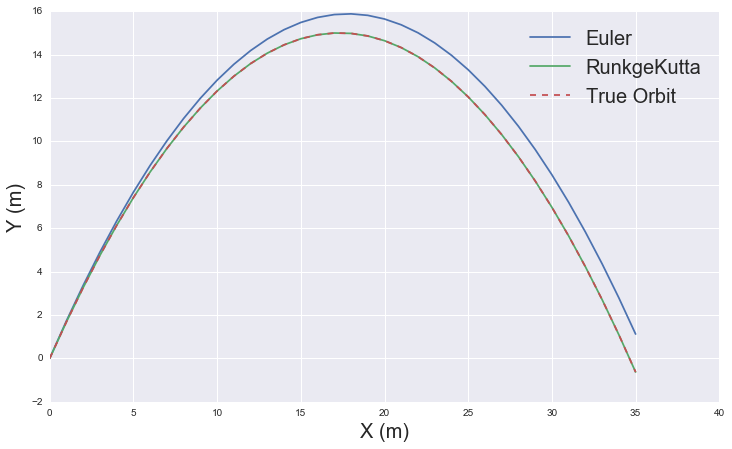

In [244]:
plt.plot(Xe[:,0],Ye[:,0],label='Euler')
plt.plot(Xrk[:,0],Yrk[:,0],label='RunkgeKutta')
plt.plot(xr,yr,'--',label='True Orbit')
plt.xlabel('X (m)',fontsize=20)
plt.ylabel('Y (m)',fontsize=20)
plt.legend(fontsize=20)

In [50]:
de=np.sqrt((Xe[:,0]-xr)**2+(Ye[:,0]-yr)**2)
drk=np.sqrt((Xrk[:,0]-xr)**2+(Yrk[:,0]-yr)**2)

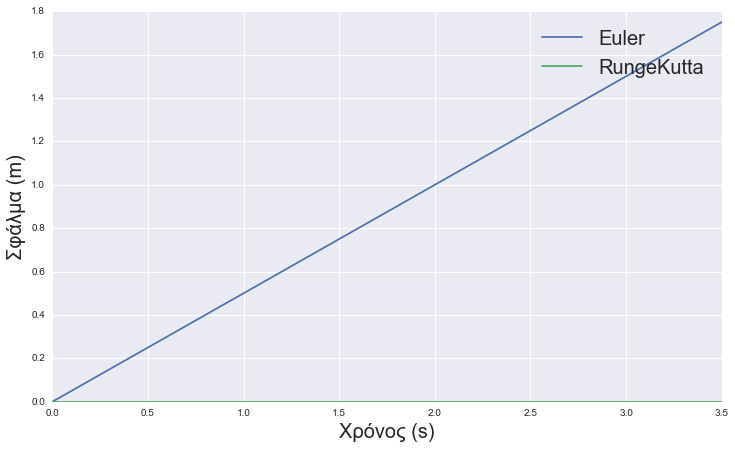

In [52]:
plt.plot(T,de,label='Euler')
plt.plot(T,drk,label='RungeKutta')
#plt.yscale('log')
plt.ylabel(u'Σφάλμα (m)',fontsize=20)
plt.xlabel(u'Χρόνος (s)',fontsize=20)
plt.legend(fontsize=20)

In [226]:
def dist(X,Y,Xr,Yr):
    return np.sqrt((X[-1][0]-Xr[-1])**2+(Y[-1][0]-Yr[-1])**2)

In [53]:
np.logspace(-5,0,50)

array([  1.00000000e-05,   1.26485522e-05,   1.59985872e-05,
         2.02358965e-05,   2.55954792e-05,   3.23745754e-05,
         4.09491506e-05,   5.17947468e-05,   6.55128557e-05,
         8.28642773e-05,   1.04811313e-04,   1.32571137e-04,
         1.67683294e-04,   2.12095089e-04,   2.68269580e-04,
         3.39322177e-04,   4.29193426e-04,   5.42867544e-04,
         6.86648845e-04,   8.68511374e-04,   1.09854114e-03,
         1.38949549e-03,   1.75751062e-03,   2.22299648e-03,
         2.81176870e-03,   3.55648031e-03,   4.49843267e-03,
         5.68986603e-03,   7.19685673e-03,   9.10298178e-03,
         1.15139540e-02,   1.45634848e-02,   1.84206997e-02,
         2.32995181e-02,   2.94705170e-02,   3.72759372e-02,
         4.71486636e-02,   5.96362332e-02,   7.54312006e-02,
         9.54095476e-02,   1.20679264e-01,   1.52641797e-01,
         1.93069773e-01,   2.44205309e-01,   3.08884360e-01,
         3.90693994e-01,   4.94171336e-01,   6.25055193e-01,
         7.90604321e-01,

In [237]:
EulerError=np.array([])
RKError=np.array([])
dts=np.logspace(-5,0,50)
for dt in dts:
    T=np.arange(0,3.6,dt)
    Xe = Euler(dux,np.array([x0,u0x]),T)
    Ye = Euler(duy,np.array([y0,u0y]),T)
    Xrk = RungeKutta(dux,np.array([x0,u0x]),T)
    Yrk = RungeKutta(duy,np.array([y0,u0y]),T)
    xr=x0+u0x*T
    yr=y0+u0y*T-0.5*g*T**2
    EulerError=np.append(EulerError,dist(Xe,Ye,xr,yr))
    RKError=np.append(RKError,dist(Xrk,Yrk,xr,yr))

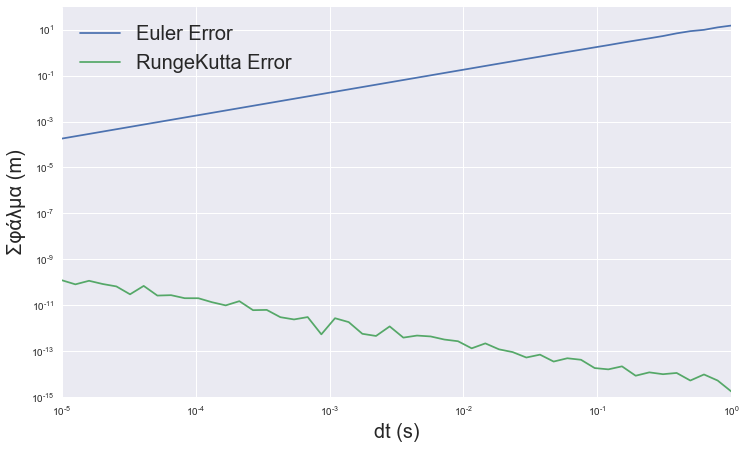

In [242]:
plt.loglog(dts,EulerError,label='Euler')
plt.loglog(dts,RKError,label='Runge Kutta')
plt.ylabel(u'Σφάλμα (m)',fontsize=20)
plt.xlabel('dt (s)',fontsize=20)
plt.legend(fontsize=20,loc='best')

3) Για το παραπάνω πρόβλημα, βρείτε (με υπολογιsτικό τρόπο) τη γωνία ρίψηw ώστε να πετυχετε τη μεγιστη εμβελεια. Ακόμη, θεωρείστε ότι υπάρχει αεροδυναμική τριβή, γραμμική ως προς την ταχυτητα, με συντελεστή που ισουται αριθμητικά με το 1/5 του g και υπολογίστε την γωνία ρίψης, ωστε να πετυχετε τη μεγιστη εμβελεια.

Λύνουμε το σύστημα:
$$
\mathbf{X}=
\begin{pmatrix}
\dot{x} \\ \dot{u}_x
\end{pmatrix}=
\begin{pmatrix}
u_x \\ -\frac{g}{5}u_x
\end{pmatrix}
$$
και
$$
\mathbf{Y}=
\begin{pmatrix}
\dot{y} \\ \dot{u}_y 
\end{pmatrix}
=
\begin{pmatrix}
u_y \\ -g -\frac{g}{5}u_y
\end{pmatrix}
$$

In [274]:
phi=np.pi/3
g=10.
x0,y0=0.,0.
u0x,u0y=20.*np.cos(phi),20.*np.sin(phi)
def dux(t,x,ux): return np.array([ux,-g/5*ux])
def duy(t,y,uy): return np.array([uy,-g-g/5*uy])

In [275]:
T=np.arange(0,3.6,0.01)
Xrk = RungeKutta(dux,np.array([x0,u0x]),T)
Yrk = RungeKutta(duy,np.array([y0,u0y]),T)

In [276]:
e=0.2
Xrk[:,0][np.logical_and(Yrk[:,0]>0.-e,Yrk[:,0]<0.+e)][-1]

4.9433329338824805

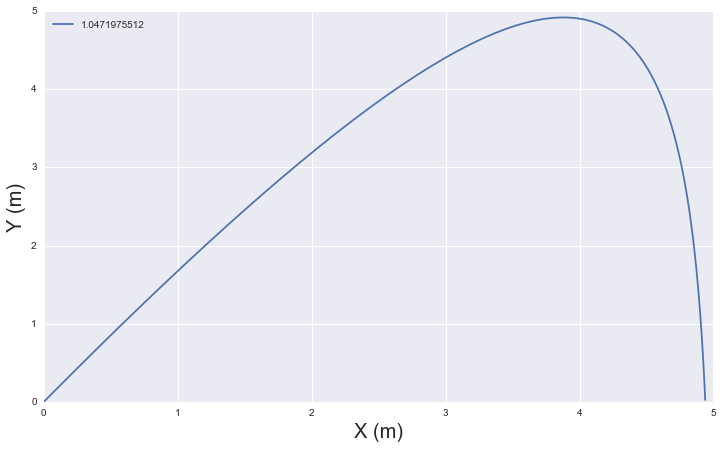

In [277]:
plt.plot(Xrk[:,0][Yrk[:,0]>=0],Yrk[:,0][Yrk[:,0]>=0],label=phi)
plt.xlabel('X (m)',fontsize=20)
plt.ylabel('Y (m)',fontsize=20)
plt.legend(fontsize=10,loc='best')

0.0 3.42953179811
0.196349540849 7.43715730107
0.392699081699 8.36646620566
0.589048622548 7.96193897664
0.785398163397 6.91601484397
0.981747704247 5.48327525965
1.1780972451 3.79271741216
1.37444678595 1.93722167658


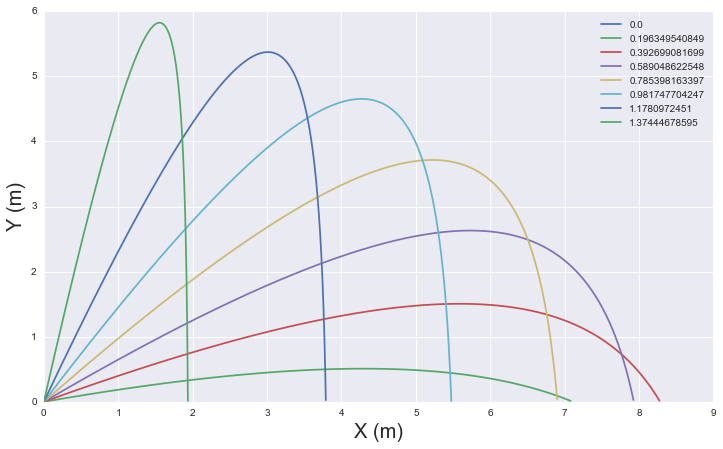

In [280]:
for phi in np.arange(0.,np.pi/2,np.pi/16):
    g=10.
    x0,y0=0.,0.
    u0x,u0y=20.*np.cos(phi),20.*np.sin(phi)
    Xrk = RungeKutta(dux,np.array([x0,u0x]),T)
    Yrk = RungeKutta(duy,np.array([y0,u0y]),T)
    print phi,Xrk[:,0][np.logical_and(Yrk[:,0]>0.-e,Yrk[:,0]<0.+e)][-1]
    plt.plot(Xrk[:,0][Yrk[:,0]>=0],Yrk[:,0][Yrk[:,0]>=0],label=phi)
plt.xlabel('X (m)',fontsize=20)
plt.ylabel('Y (m)',fontsize=20)
plt.legend(fontsize=10,loc='best')

In [301]:
bestR=0.
bestPhi=0.
a=np.array([])
Phis=np.arange(0.,np.pi/2,np.pi/200)
for phi in Phis:
    u0x,u0y=20.*np.cos(phi),20.*np.sin(phi)
    Xrk = RungeKutta(dux,np.array([x0,u0x]),T)
    Yrk = RungeKutta(duy,np.array([y0,u0y]),T)
    embelia=Xrk[:,0][np.logical_and(Yrk[:,0]>0.-e,Yrk[:,0]<0.+e)][-1]
    a=np.append(a,embelia)
    if embelia>bestR:
        bestR=embelia
        bestPhi=phi
print bestR,bestPhi

8.37762350812 0.408407044967


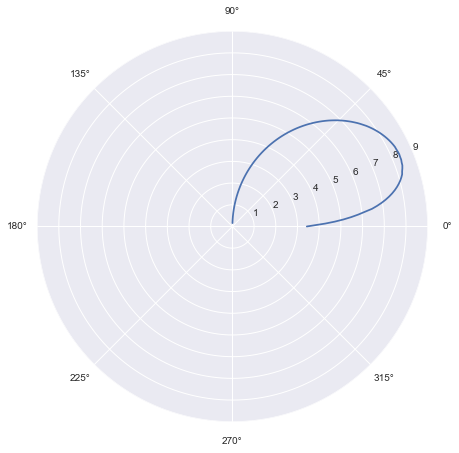

In [326]:
plt.polar(Phis,a)

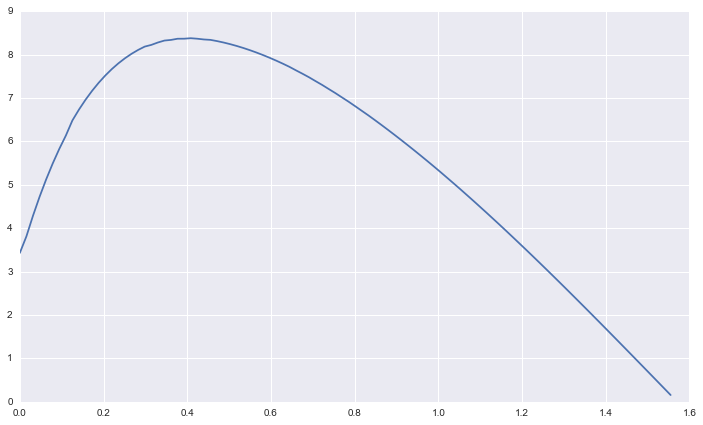

In [298]:
plt.plot(np.arange(0.,np.pi/2,np.pi/200),a)